In [1]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
pathToData = '/mnt/opt/groups/jpet/NEMA_Image_Quality/3000s/'
someFile = 'NEMA_IQ_384str_N0_1000_COINCIDENCES_part00'

def dataFrameNames():
    return [
        "x1", # 1 gamma detected x position [cm]
        "y1", # 1 gamma detected y position [cm]
        "z1", # 1 gamma detected z position [cm]
        "t1", # 1 gamma detection time [ps]
        "x2", # 2 gamma detected x position [cm]
        "y2", # 2 gamma detected y position [cm]
        "z2", # 2 gamma detected z position [cm]
        "t2", # 2 gamma detection time [ps]
        "vol1", # 1 gamma volume ID
        "vol2", # 2 gamma volume ID
        "e1", # 1 gamma energy loss during detection [keV]
        "e2", # 2 gamma energy loss during detection [keV]
        "class", # Type of coincidence(1-true, 2-phantom-scattered, 3-detector-scattered, 4-accidental)
        "sX1", # 1 gamma emission x position [cm]
        "sY1", # 1 gamma emission y position [cm]
        "sZ1" # 1 gamma emission z position [cm]
    ] 

In [3]:
data = pd.read_csv(pathToData+someFile, sep = "\t", names=dataFrameNames(), nrows=100000)

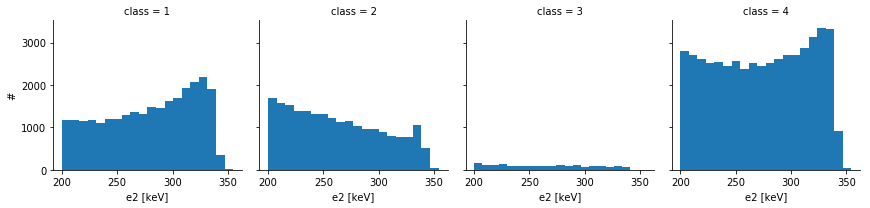

In [6]:
grid = sns.FacetGrid(data, col='class')
grid.map(plt.hist, 'e2', bins=20).set_axis_labels("e2 [keV]", "#")

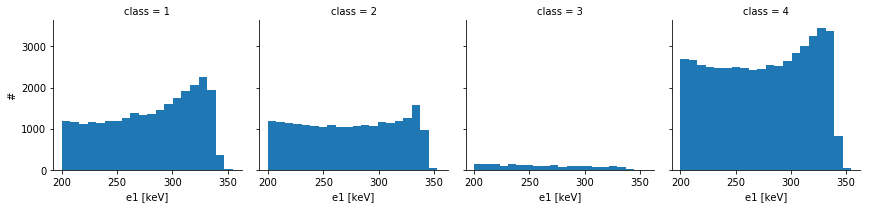

In [7]:
grid = sns.FacetGrid(data, col='class')
grid.map(plt.hist, 'e1', bins=20).set_axis_labels("e1 [keV]", "#")

In [9]:
def emissionPoint(row):
    sOfL = 0.03 # cm/ps
    halfX = (row['x1'] - row['x2'])/2
    halfY = (row['y1'] - row['y2'])/2
    halfZ = (row['z1'] - row['z2'])/2
    LORHalfSize = math.sqrt(halfX**2 + halfY**2 + halfZ**2)
    versX = halfX/LORHalfSize
    versY = halfY/LORHalfSize
    versZ = halfZ/LORHalfSize
    dX = row['dt']*sOfL*versX/2
    dY = row['dt']*sOfL*versY/2
    dZ = row['dt']*sOfL*versZ/2
    return(  
        (row['x1'] + row['x2'])/2 - dX,
        (row['y1'] + row['y2'])/2 - dY,
        (row['z1'] + row['z2'])/2 - dZ,
        )

data[['dt']] = data.apply(lambda row: pd.Series(row['t1'] - row['t2']), axis = 1)
data[['RX1','RY1','RZ1']] = data.apply(lambda row: pd.Series(emissionPoint(row)), axis = 1)

In [10]:
def distance(row):
    return math.sqrt((row['sX1'] - row['RX1'])**2 + (row['sY1'] - row['RY1'])**2 + (row['sZ1'] - row['RZ1'])**2)

data['emissionDistance']=data.apply(lambda row:distance(row), axis=1)

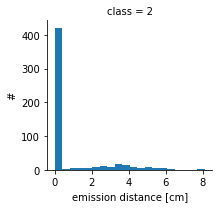

In [11]:
dataNext = data[(data['e1'] >320) & (data['e2'] >320 ) &(data['class'] == 2 )]
grid = sns.FacetGrid(dataNext, col='class')
grid.map(plt.hist, 'emissionDistance', bins=20).set_axis_labels("emission distance [cm]", "#")

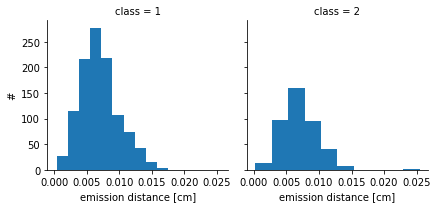

In [13]:
dataNext = data[(data['e1'] >320) & (data['e2'] >320 ) &(data['class'] !=4 ) &(data['class'] !=3 ) & (data['emissionDistance'] <0.05 )]
grid = sns.FacetGrid(dataNext, col='class')
grid.map(plt.hist, 'emissionDistance', bins=10).set_axis_labels("emission distance [cm]", "#")